# **<font color=#FF3399> Challenge Teste de Hipóteses </font>**

Bootcamp Data Analytics & Tech Minas 2023 

WoMakersCode


## **<font color=#FF3399> Desafio 1 : Cosméticos </font>**

**Contexto:**

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. 

O time de produtos dessa empresa está interessado criar novos batons com maior durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de dados (desafio_01_cosmeticos.csv) contendo as seguintes informacoes:

- id_produto: código identificador do produto, com a fórmula utilizada. Para diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3
- id_voluntária: código identificador da voluntária que utilizou o produto.
- durabilidade: quanto tempo o produto durou em horas.
- idade: idade da voluntária
- exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso contrário.

De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

Importando as bibliotecas

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import normaltest
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import norm 

Lendo a base de dados e entendendo as características

In [25]:
df = pd.read_csv('cosmeticos.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [27]:
df.describe()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.000000,150.500000,17.133333,36.886667,0.440000
std,0.817861,86.746758,10.942945,12.625841,0.497216
min,1.000000,1.000000,5.000000,18.000000,0.000000
25%,1.000000,75.750000,9.000000,26.000000,0.000000
50%,2.000000,150.500000,14.000000,36.000000,0.000000
75%,3.000000,225.250000,20.000000,48.000000,1.000000
max,3.000000,300.000000,48.000000,60.000000,1.000000


Ao rodar as funções info e describe nota-se que:
1. O dataset possui 300 dados e nenhum espaço nulo;
2. A média de durabilidade é de 17.13 horas;
3. A idade média do estudo é de 36 anos, minima 18 anos e máxima 60 anos;
4. Aproximadamente 50% da base teve exposição ao sol.

## **Pergunta 1**: Existe diferença estatisticamente significativa na durabilidade dos batons com formulas diferentes? 


---
Para responder essa pergunta primeiramente será plotado a durabilidade por tipo de batom para uma análise visual e depois realizado um teste de hipóteses.


### 1.1 Análise Visual

Text(0, 0.5, 'Durabilidade em horas')

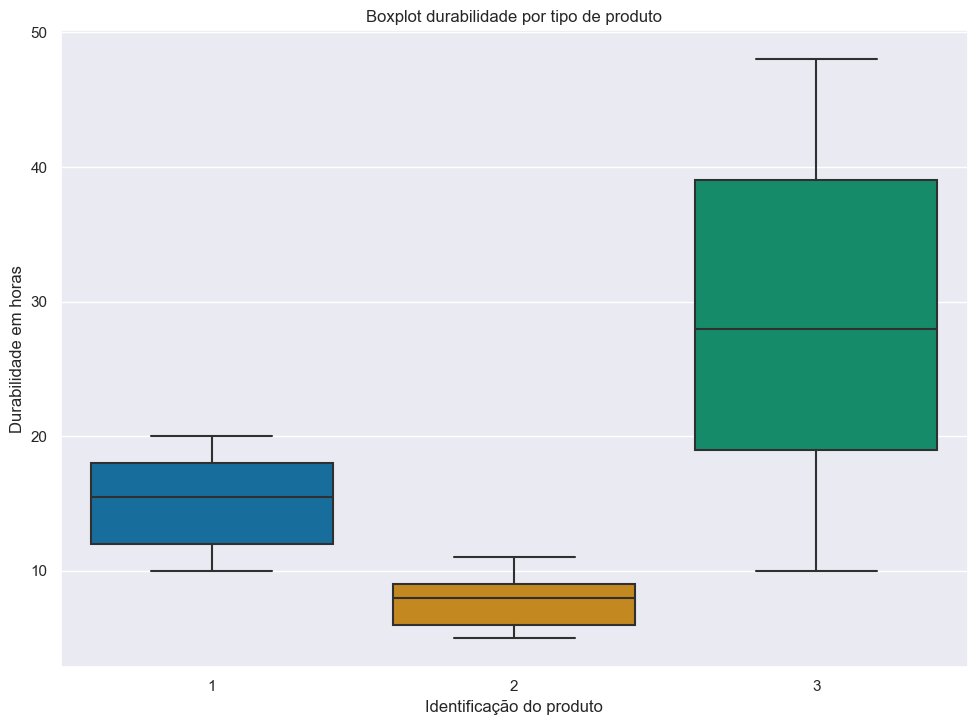

In [28]:
ax_box = sns.boxplot(x="id_produto", y="durabilidade", data=df, palette = "colorblind")
ax_box.set_title("Boxplot durabilidade por tipo de produto")
ax_box.set_xlabel("Identificação do produto")
ax_box.set_ylabel("Durabilidade em horas")

Text(0, 0.5, 'Quantidade')

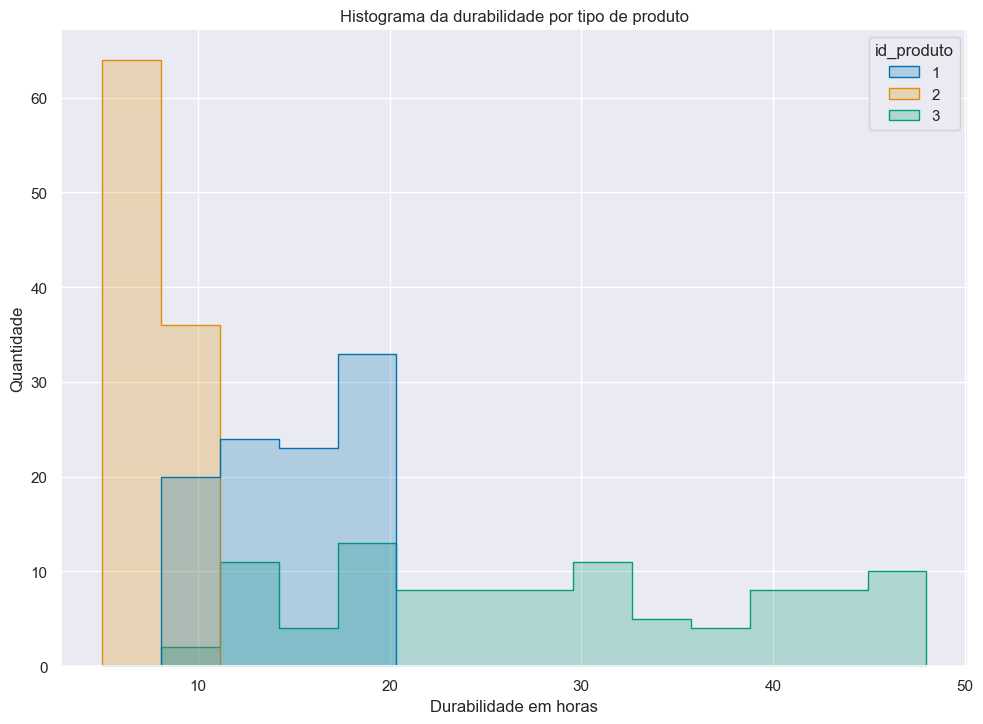

In [29]:
ax_hist = sns.histplot(data=df, x="durabilidade", hue="id_produto", element="step", palette = "colorblind")
ax_hist.set_title("Histograma da durabilidade por tipo de produto")
ax_hist.set_xlabel("Durabilidade em horas")
ax_hist.set_ylabel("Quantidade")

Considerações:

1. O produto 3 apresenta maior durabilidade em horas, a mediana é muito mais alta quando comparado aos outros dois.
2. Apesar do melhor resultado para durabilidade, apresenta inscontância nos resultados, a diferença entre o valor máximo e mínimo é grande, o deixando menos consistente.

### 1.2 Teste de hipóteses

A função normaltest testa a hipótese nula H0 de que a amostra é proveniente de uma distribuição normal.

- Hipótese Nula (H0): Os dados são normalmente distribuídos. 
- Hipótese Alternativa (H1): Os dados não são normalmente distribuídos.

Rejeitar H0 se pvalor <= significancia

In [30]:
# função para definir se a variável é distribuição normal

significancia = 0.05
def teste_normalidade(df, id_produto, coluna):
    for produto in id_produto:
        stat_test, p_valor_norm_prod_durab = normaltest(df[df["id_produto"] == produto][coluna])
        if p_valor_norm_prod_durab <= significancia:
            print(f'Para id_produto = {produto}, e variável = {coluna}, o p-valor é de {p_valor_norm_prod_durab.round(3)} e não é uma distribuição normal')
        else:
            print(f'Para id_produto = {produto}, e variável = {coluna}, o p-valor é de {p_valor_norm_prod_durab.round(3)}, e é uma distribuição normal')

teste_normalidade(df, [1,2,3], "durabilidade")

Para id_produto = 1, e variável = durabilidade, o p-valor é de 0.0 e não é uma distribuição normal
Para id_produto = 2, e variável = durabilidade, o p-valor é de 0.0 e não é uma distribuição normal
Para id_produto = 3, e variável = durabilidade, o p-valor é de 0.0 e não é uma distribuição normal


Como H0 foi rejeitada, conclui-se que os dados não possuem distribuição normal. 

Logo, será utilizado o teste não paramétrico de Kruskal-Wallis.

- Hipósete Nula (H0) = Não há diferenças significativas entre os grupos (Durabilidade Produto 1 = Durabilidade Produto 2 = Durabilidade Produto 3)
- Hipótese Alternativa (H1) = Há diferenças significativas entre as distribuições da variável contínua entre os grupos (Durabilidade Produto 1 != Durabilidade Produto 2 != Durabilidade Produto 3)

Rejeitar H0 se o p-valor <= significancia

In [31]:
significancia = 0.05
durabilidade_1 = df[df["id_produto"] == 1]["durabilidade"]
durabilidade_2 = df[df["id_produto"] == 2]["durabilidade"]
durabilidade_3 = df[df["id_produto"] == 3]["durabilidade"]

statistic, p_valor_durabilidade = kruskal(durabilidade_1, durabilidade_2, durabilidade_3)

if p_valor_durabilidade <= significancia:
    print(f'O p-valor é de {p_valor_durabilidade.round(5)}, logo H0 é rejeitada, ou seja, há diferenças significativas entre os grupos.')
else:
    print(f'O p-valor é de {p_valor_durabilidade.round(5)}, logo H0 não é rejeitada, ou seja, não há diferenças significativas entre os grupos.')
    


O p-valor é de 0.0, logo H0 é rejeitada, ou seja, há diferenças significativas entre os grupos.


Podemos inferir que os batons são estatisticamente diferentes com 95% de confiança.

## **Pergunta 2**: Existe diferença persiste ou nao quando a voluntária se expoe ao sol? 


---
Primeiramente será realizada uma análise visual e depois realizado um teste de hipóteses.


### 2.1 Análise visual

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


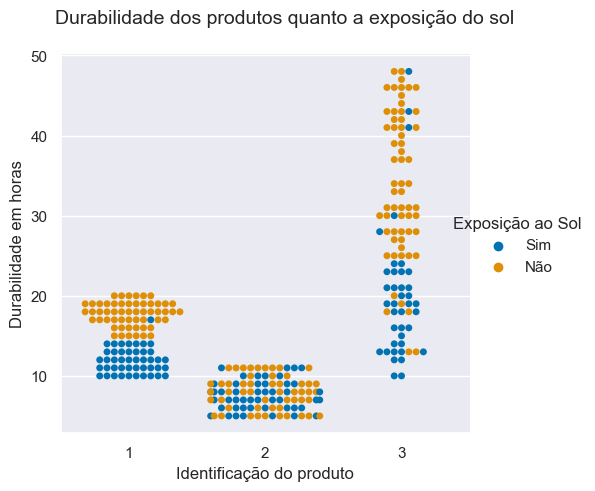

In [36]:
# df_leg = df['exposicao_sol'].astype(str)
# df_leg = df.replace({'exposicao_sol': {1: 'Sim'}})
# df_leg = df['exposicao_sol'].replace(['1'], 'Sim')
# df_leg
df_leg = df.replace({'exposicao_sol': {1: 'Sim', 0: 'Não'}})

ax_box_sol = sns.catplot(x='id_produto', y='durabilidade', hue='exposicao_sol', kind='swarm', data=df_leg, palette = "colorblind")
ax_box_sol.fig.suptitle("Durabilidade dos produtos quanto a exposição do sol", fontsize=14)
ax_box_sol.fig.subplots_adjust(top=0.89)
ax_box_sol.set_axis_labels('Identificação do produto', 'Durabilidade em horas')
ax_box_sol.legend.set_title('Exposição ao Sol')


Pelo gráfico, observa-se que a durabilidade é maior quando a voluntária não se expõe ao sol, nos 3 produtos.
Nos produtos 1 e 3 a diferença é mais significativa.

### 2.2 Teste de hipóteses

A função normaltest testa a hipótese nula H0 de que a amostra é proveniente de uma distribuição normal.

- Hipótese Nula (H0): Os dados são normalmente distribuídos. 
- Hipótese Alternativa (H1): Os dados não são normalmente distribuídos.

Rejeitar H0 se pvalor <= significancia

In [37]:
significancia = 0.05

def teste_normalidade_sol(df, exposicao_sol, coluna):
    for exp in exposicao_sol:
        stat_test, p_valor_norm_exp_durab = normaltest(df[df["exposicao_sol"] == exp][coluna])
        
        if p_valor_norm_exp_durab <= significancia:
            print(f'Para exposicao_sol = {exp}, e variável {coluna}, o p-valor é de {p_valor_norm_exp_durab.round(3)} e não é uma distribuição normal')
        else:
            print(f'Para exposicao_sol = {exp}, e variável {coluna}, o p-valor é de {p_valor_norm_exp_durab.round(3)}, e é uma distribuição normal')
            
teste_normalidade_sol(df, [0,1], "durabilidade")            

Para exposicao_sol = 0, e variável durabilidade, o p-valor é de 0.0 e não é uma distribuição normal
Para exposicao_sol = 1, e variável durabilidade, o p-valor é de 0.0 e não é uma distribuição normal


Como H0 foi rejeitada, conclui-se que os dados não possuem distribuição normal. 

Logo, será utilizado o teste não paramétrico de Kruskal-Wallis.

- Hipósete Nula (H0) = Não há diferenças significativas entre os grupos (Durabilidade com exposição ao sol = Durabilidade sem exposição ao sol)
- Hipótese Alternativa (H1) = Há diferenças significativas entre as distribuições da variável contínua entre os grupos (Durabilidade com exposição ao sol != Durabilidade sem exposição ao sol)

Rejeitar H0 se o p-valor <= significancia

In [46]:
significancia = 0.05
durabilidade_exposicao1_sol = df[(df.id_produto == 1)&(df.exposicao_sol == 1)].durabilidade
durabilidade_exposicao2_sol = df[(df.id_produto == 2)&(df.exposicao_sol == 1)].durabilidade
durabilidade_exposicao3_sol= df[(df.id_produto == 3)&(df.exposicao_sol == 1)].durabilidade

statistic, p_valor_exposicao_sol = kruskal(durabilidade_exposicao1_sol, durabilidade_exposicao2_sol, durabilidade_exposicao3_sol)

if p_valor_exposicao_sol <= significancia:
    print(f'O p-valor é de {p_valor_exposicao_sol}, logo H0 é rejeitada, ou seja, há diferenças significativas entre os grupos.')
else:
    print(f'O p-valor é de {p_valor_exposicao_sol}, logo H0 não é rejeitada, ou seja, não há diferenças significativas entre os grupos.')


O p-valor é de 1.6623483945921027e-22, logo H0 é rejeitada, ou seja, há diferenças significativas entre os grupos.


Podemos inferir que quanto a exposição ao sol, a durabilidade dos batons são estatisticamente diferentes com 95% de confiança.

## **Pergunta 3**: E quanto a idade? 

### 3.1 Análise visual

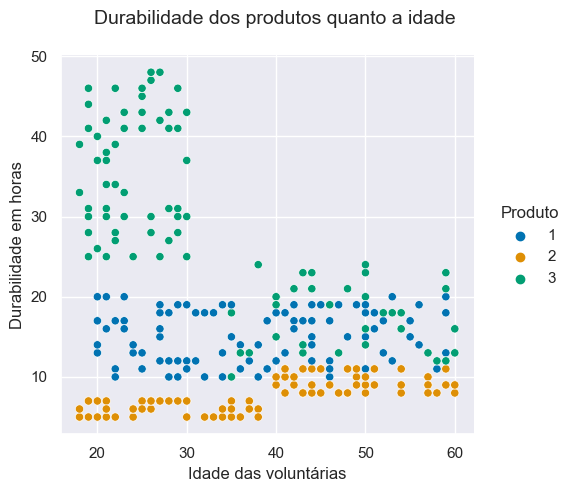

In [47]:
ax_box_idade = sns.relplot(x='idade', y='durabilidade', hue='id_produto', data=df, palette = "colorblind")
ax_box_idade.fig.suptitle("Durabilidade dos produtos quanto a idade", fontsize=14)
ax_box_idade.fig.subplots_adjust(top=0.89)
ax_box_idade.set_axis_labels('Idade das voluntárias', 'Durabilidade em horas')
ax_box_idade.legend.set_title('Produto')

Através do gráfico observa-se que:
- Para o produto 1, a idade não afeta muito na durabilidade;
- Para o produto 2, a partir dos 40 anos a durabilidade tem um pequeno aumento. Supõe-se que este produto contenha algum produto anti-aging na sua fórmula.
- Para o produto 3, tem mais durabilidade, mas com o aumento a idade (a partir dos 35 anos) há uma queda significativa. Este seria o mais indicado para consumidoras abaixo de 30 anos.


Dada a análise exploratória, é interessante agregar a variável em faixas etárias. As categorias de idade foram divididas da seguinte forma:

- Até 30 anos
- De 30 a 40 anos
- De 40 a 50 anos
- Mais de 50 anos

In [48]:
### A funcao abaixo irá ser aplicada em cada uma das linhas do dataframe para categorizar a faixa etária
def categoria_idade(row):
  if(row['idade']<=30):
    return "Ate_30_anos"
  elif((row['idade']>30)&(row['idade']<=40)):
    return "De_31_a_40_anos"
  elif((row['idade']>40)&(row['idade']<=50)):
    return "De_41_a_50_anos"
  elif(row['idade']>50):
    return "Mais_de_50_anos"

In [49]:
### aplicando a função criada
df["faixa_etaria"] = df.apply(categoria_idade, axis =1)

In [50]:
### observando a quantidade de voluntárias em cada uma das faixas de idade
df["faixa_etaria"].value_counts()

Ate_30_anos        124
De_41_a_50_anos     78
De_31_a_40_anos     49
Mais_de_50_anos     49
Name: faixa_etaria, dtype: int64

Analisando o boxplot da durabilidade por produto e faixa etária

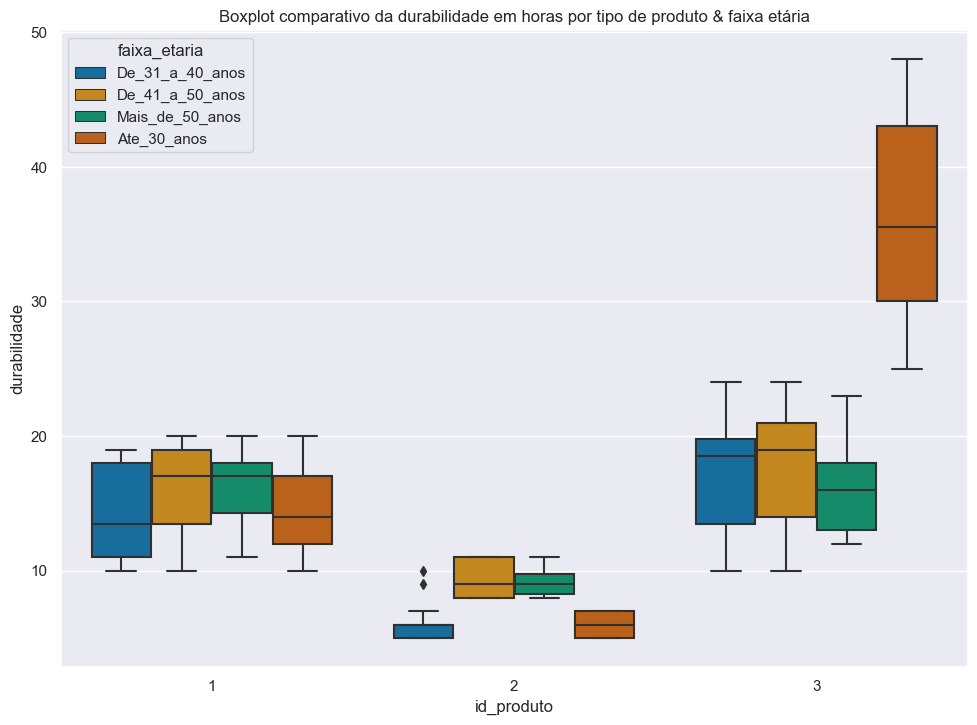

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="id_produto", y="durabilidade", hue = "faixa_etaria",data=df, palette = "colorblind").set_title("Boxplot comparativo da durabilidade em horas por tipo de produto & faixa etária")

Podemos perceber que:
- O Produto 1: Funciona melhor para mulheres acima dos 40 anos (mediana mais deslocada) e pior dos 31 a 40 anos
- O Produto 2: Funciona melhor para mulheres acima dos 40 anos, conforme já vimos no gráfico de dispersao
- O Produto 3: Funciona melhor para mulheres de é 30 anos.

### 3.2 Teste de hipóteses

A função normaltest testa a hipótese nula H0 de que a amostra é proveniente de uma distribuição normal.

- Hipótese Nula (H0): Os dados são normalmente distribuídos. 
- Hipótese Alternativa (H1): Os dados não são normalmente distribuídos.

Rejeitar H0 se pvalor <= significancia

In [52]:
significancia = 0.05
stat_test, p_valor_norm_idade = normaltest(df["idade"])
        
if p_valor_norm_idade <= significancia:
    print(f'o p-valor para a variável idade é de {p_valor_norm_idade.round(3)} e não é uma distribuição normal')
else:
    print(f'lo p-valor para a variável idade é de {p_valor_norm_idade.round(3)}, e é uma distribuição normal')
            

o p-valor para a variável idade é de 0.0 e não é uma distribuição normal


Como H0 foi rejeitada, conclui-se que os dados não possuem distribuição normal. 

Logo, será utilizado o teste não paramétrico de Kruskal-Wallis.

- Hipósete Nula (H0) = Não há diferenças significativas entre os grupos (Durabilidade quanto a idade = Durabilidade quanto a idade)
- Hipótese Alternativa (H1) = Há diferenças significativas entre as distribuições da variável contínua entre os grupos (Durabilidade quanto a idade != Durabilidade quanto a idade)

Rejeitar H0 se o p-valor <= significancia

In [66]:

significancia = 0.05
durabilidade_idade30_1 = df[(df.id_produto == 1)&(df.faixa_etaria == 'Ate_30_anos')].durabilidade
durabilidade_idade30_2 = df[(df.id_produto == 2)&(df.faixa_etaria == 'Ate_30_anos')].durabilidade
durabilidade_idade30_3= df[(df.id_produto == 3)&(df.faixa_etaria == 'Ate_30_anos')].durabilidade

statistic, p_valor_idade_30 = kruskal(durabilidade_idade30_1, durabilidade_idade30_2, durabilidade_idade30_3)



In [68]:
significancia = 0.05
durabilidade_idade40_1 = df[(df.id_produto == 1)&(df.faixa_etaria == 'De_31_a_40_anos')].durabilidade
durabilidade_idade40_2 = df[(df.id_produto == 2)&(df.faixa_etaria == 'De_31_a_40_anos')].durabilidade
durabilidade_idade40_3= df[(df.id_produto == 3)&(df.faixa_etaria == 'De_31_a_40_anos')].durabilidade

statistic, p_valor_idade_40 = kruskal(durabilidade_idade40_1, durabilidade_idade40_2, durabilidade_idade40_3)

In [67]:
significancia = 0.05
durabilidade_idade50_1 = df[(df.id_produto == 1)&(df.faixa_etaria == 'De_41_a_50_anos')].durabilidade
durabilidade_idade50_2 = df[(df.id_produto == 2)&(df.faixa_etaria == 'De_41_a_50_anos')].durabilidade
durabilidade_idade50_3= df[(df.id_produto == 3)&(df.faixa_etaria == 'De_41_a_50_anos')].durabilidade

statistic, p_valor_idade_50 = kruskal(durabilidade_idade50_1, durabilidade_idade50_2, durabilidade_idade50_3)

In [69]:
significancia = 0.05
durabilidade_idademais_1 = df[(df.id_produto == 1)&(df.faixa_etaria == 'Mais_de_50_anos')].durabilidade
durabilidade_idademais_2 = df[(df.id_produto == 2)&(df.faixa_etaria == 'Mais_de_50_anos')].durabilidade
durabilidade_idademais_3= df[(df.id_produto == 3)&(df.faixa_etaria == 'Mais_de_50_anos')].durabilidade

statistic, p_valor_idade_mais = kruskal(durabilidade_idademais_1, durabilidade_idademais_2, durabilidade_idademais_3)

In [72]:
print(f'Resultados de p-valor: \nAte_30_anos: {p_valor_idade_30}\nDe_31_a_40_anos: {p_valor_idade_40}\nDe_41_a_50_anos: {p_valor_idade_50}\nMais_de_50_anos: {p_valor_idade_mais}')

# Ate_30_anos        124
# De_41_a_50_anos     78
# De_31_a_40_anos     49
# Mais_de_50_anos     49
# Name: faixa_etaria, dtype: int64

Resultados de p-valor: 
Ate_30_anos: 1.464181419346425e-23
De_31_a_40_anos: 3.4918865260475274e-08
De_41_a_50_anos: 3.757370982253044e-12
Mais_de_50_anos: 5.061825213225392e-08


Para todos os 3 produtos, há diferença significativa quando a classe de idade

## **Pergunta 4**: Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposicao ao sol? 


---
Primeiramente será realizada uma análise visual e depois realizado um teste de hipóteses.

In [54]:
df_com_exposicao_sol = df.loc[df["exposicao_sol"] == 1]
df_com_exposicao_sol

df_sol_prod1 = df_com_exposicao_sol[df_com_exposicao_sol["id_produto"] == 1]["durabilidade"]
df_sol_prod2 = df_com_exposicao_sol[df_com_exposicao_sol["id_produto"] == 2]["durabilidade"]
df_sol_prod3 = df_com_exposicao_sol[df_com_exposicao_sol["id_produto"] == 3]["durabilidade"]

print(f"As médias de durabilidade em horas são:\nProduto 1: {df_sol_prod1.mean().round(2)}\nProduto 2: {df_sol_prod2.mean().round(2)}\nProduto 3: {df_sol_prod3.mean().round(2)}")

if df_sol_prod1.mean() > df_sol_prod2.mean() and df_sol_prod1.mean() > df_sol_prod3.mean():
    print(f'O produto 1 tem maior durabilidade na exposição ao sol.')
elif df_sol_prod2.mean() > df_sol_prod1.mean() and df_sol_prod2.mean()> df_sol_prod3.mean():
    print(f'O produto 2 tem maior durabilidade na exposição ao sol.')
else:
    print(f'O produto 3 tem maior durabilidade na exposição ao sol.')
    
                         

As médias de durabilidade em horas são:
Produto 1: 11.91
Produto 2: 7.56
Produto 3: 20.1
O produto 3 tem maior durabilidade na exposição ao sol.


## **Conclusão Final do Desafio**:


---

As formulações estudadas são bem diferentes, de modo que:

- O Produto 1, de modo geral apresenta durabilidade intermediária:
  - Analisando mais especificamente, essa durabilidade é mais acentuada nos grupos: acima dos 40 anos
  - Apresenta pior durabilidade quando ocorre a exposição ao sol.


- O Produto 2: 
  - Apresenta uma durabilidade menor que os outros, mas possui maior consistência quando falamos sobre exposição ao sol. Sendo a durabilidade deste produto pouco afetada por tal fator.
  - Apresenta uma melhor durabilidade para faixas acima dos 40 anos
  - tem uma distribuicao muito diferente dos outros, podendo ser comercializado de forma/ para públicos diferentes.


- O Produto 3, apresenta maior durabilidade.
  - Analisando mais especificamente, essa durabilidade é mais acentuada nos grupos: de até 30 anos e sem exposição ao sol
  - A durabilidade deste produto decai bastante para faixas etárias de 31 a 40 anos e de 31 a 40 anos, sobretudo. 



## **<font color=#FF3399> Desafio 2 : Alimentos </font>**

**Contexto:**

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição normal com média igual a  7,85 reais e desvio padrão igual a 3,32 reais.  Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.

Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados. 

Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52. 



1. Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?

In [2]:
desvio_padrao = 3.32
media = 7.85
media_amostra = 11.52
n = 45

H0 - media_amostra = media

H1 - media_amostra =! media

In [6]:
import numpy as np
import scipy.stats as ss

significancia = 0.05
confianca = 0.95

### cálculo do valor crítico
alpha = 0.05
confiança = 1 - alpha
probabilidade = (0.5 + (confiança / 2)) ### o teste será bi-caudal
valor_critico = ss.norm.ppf(probabilidade) ## norm ppf calcula o valor critico da distribuicao do teste
print(f'O valor crítico de z é {valor_critico.round(2)}.')

numerador = media_amostra - media
denominador = desvio_padrao / np.sqrt(n)
z = numerador/denominador
print(f'O valor da estatística de teste z é de {z.round(3)}')



O valor crítico de z é 1.96.
O valor da estatística de teste z é de 7.415


2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [ ]:
print(f'A variável teste foi calculada no exemplo anterior. O valor de z é de {z.round(3)}')

A variável teste foi calculada no exemplo anterior. O valor de z é de 7.415


In [ ]:
intervalo_de_confianca_pos = media_amostra + (1.645 * (desvio_padrao/np.sqrt(n)))
intervalo_de_confianca_neg = media_amostra - (1.645 * (desvio_padrao/np.sqrt(n)))
print(intervalo_de_confianca_pos)
print(intervalo_de_confianca_neg)


12.334137443487823
10.705862556512177


In [ ]:
from scipy.stats import norm
p_valor = 2 * (norm.sf(abs(z)))
p_valor

1.2126366281061861e-13

Conclusão: 

  Aplicando o teste z, Com 95% de confiança, obtivemos o valor crítico 1.96, e estatística z de : 7.415. Como z > 1.96, conclui-se que se encontra na área de rejeição da hipótese.
  
  Com a estatística do teste calculalmos o p-valor e concluímos que existe diferença de preço entre as regiões mencionadas.